In [180]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [181]:
data=pd.read_csv('colon_cancer (1).csv', sep=';')
data=data.drop('id_sample', axis=1)
data.head()

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
0,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
1,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
2,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
3,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
4,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal


In [182]:
def calculate_accuracy(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    print('Train accuracy:', '{:.3f}'.format(accuracy_train), 'Test accuracy:', '{:.3f}'.format(accuracy_test))
    return accuracy_train, accuracy_test, classifier

def calculate_metrics(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, pos_label='tumoral')
    recall = metrics.recall_score(y_test, y_pred, pos_label='tumoral')
    f1 = metrics.f1_score(y_test, y_pred, pos_label='tumoral')
    print('Accuracy:', '{:.3f}'.format(accuracy), 'Precision:', '{:.3f}'.format(precision), 'Recall:', '{:.3f}'.format(recall), 'F1:', '{:.3f}'.format(f1))
    return accuracy, precision, recall, f1


In [183]:
random_state = 42
y = data['tissue_status']
X = data.select_dtypes('number')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=random_state, stratify=y)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (603, 60) Test: (201, 60)


In [184]:
scaler = StandardScaler() # crée un scaler
scaler.fit(X_train) # calcule mu et sigma sur X_train uniquement
X_train_scaled = scaler.transform(X_train) # numpy object
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns) # conversion en pandas DataFrame

X_test_scaled = scaler.transform(X_test) # numpy object
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns) # conversion en pandas DataFrame


Train accuracy: 1.000 Test accuracy: 1.000


c:\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


<Axes: >

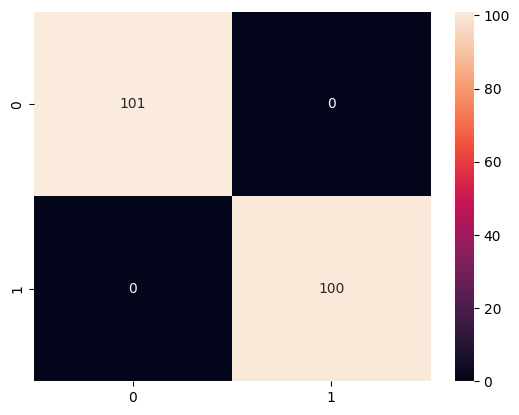

In [185]:
classifier = LinearSVC(random_state=random_state)

accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train_scaled, X_test_scaled, y_train, y_test)
#confusion matrix
y_pred_test = trained_classifier.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')

<Axes: >

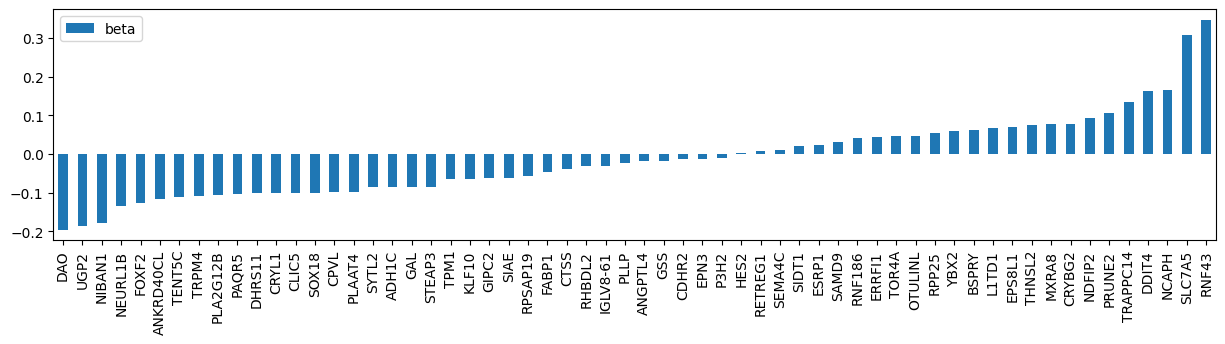

In [186]:
coefficients = pd.DataFrame(trained_classifier.coef_[0], index=X_train_scaled.columns, columns=['beta'])

coefficients = coefficients.sort_values(by='beta')
coefficients.plot.bar(figsize=(15, 3))

In [187]:
n_features=3
coefficients['abs_beta'] = coefficients['beta'].abs()
coefficients = coefficients.sort_values(by='abs_beta', ascending=False)
top_features = list(coefficients.head(n_features).index)
print('Top features SVM:', top_features)

Top features SVM: ['RNF43', 'SLC7A5', 'DAO']


Accuracy: 0.990 Precision: 0.980 Recall: 1.000 F1: 0.990
[[ 99   2]
 [  0 100]]


c:\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


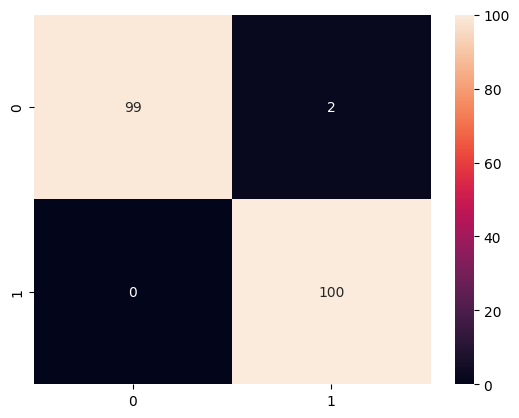

In [188]:
X_train_top = X_train_scaled[top_features]
X_test_top = X_test_scaled[top_features]

classifier = LinearSVC(random_state=random_state)
classifier.fit(X_train_top, y_train)
# calculate metrics
y_pred=classifier.predict(X_test_top)
calculate_metrics(y_test, y_pred)


#confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')

plt.show()

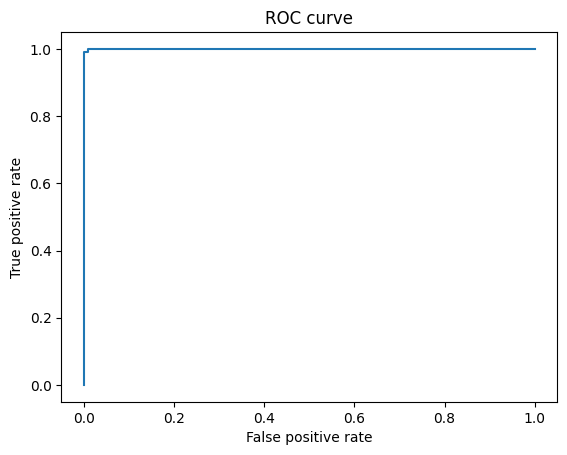

AUC: 0.9999009900990099


In [190]:
# la courbe ROC
y_pred_proba = classifier.decision_function(X_test_top)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='tumoral')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# l'aire sous la courbe ROC
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)